In [4]:
import fasttext

In [59]:
!python3 preparation.py

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fedorkurusin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fedorkurusin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

shape: (50425, 2)

percrentiles 2%: 5.0, 97%: 368.0

100%|████████████████████████████████████| 47260/47260 [01:21<00:00, 582.96it/s]

End of processing shape: (26137, 2)

write files for fasttext training in data/train.txt and data/test.txt



In [7]:
model1 = fasttext.train_supervised('data/train.txt')

def print_results(sample_size, precision, recall):
    precision   = round(precision, 2)
    recall      = round(recall, 2)
    print(f'{sample_size=}')
    print(f'{precision=}')
    print(f'{recall=}')

print_results(*model1.test('data/test.txt'))

sample_size=8626
precision=0.4
recall=0.4


Read 0M words
Number of words:  49052
Number of labels: 4
Progress: 100.0% words/sec/thread: 3243061 lr:  0.000000 avg.loss:  1.328646 ETA:   0h 0m 0s


In [9]:
model2 = fasttext.train_supervised('data/train.txt', epoch=25)

print_results(*model2.test('data/test.txt'))

Read 0M words
Number of words:  49054
Number of labels: 4
Progress:  34.5% words/sec/thread: 5349583 lr:  0.065538 avg.loss:  0.855155 ETA:   0h 0m 0s

sample_size=6809
precision=0.93
recall=0.93


Progress: 100.0% words/sec/thread: 5339797 lr:  0.000000 avg.loss:  0.523456 ETA:   0h 0m 0s


In [24]:
print_results(*model2.test('data/train.txt'))

sample_size=8626
precision=0.95
recall=0.95


In [5]:
model3 = fasttext.train_supervised('data/train.txt', epoch=10, lr=1.0)

print_results(*model3.test('data/test.txt'))

Read 0M words
Number of words:  49054
Number of labels: 4
Progress:  88.0% words/sec/thread: 5621662 lr:  0.119709 avg.loss:  0.529208 ETA:   0h 0m 0s

sample_size=6809
precision=0.95
recall=0.95


Progress: 100.0% words/sec/thread: 3247825 lr:  0.000000 avg.loss:  0.493704 ETA:   0h 0m 0s


In [6]:
model4 = fasttext.train_supervised('data/train.txt', epoch=10, lr=1.0, wordNgrams=2)

print_results(*model4.test('data/test.txt'))

Read 0M words
Number of words:  49054
Number of labels: 4
Progress:  87.4% words/sec/thread: 2828153 lr:  0.126280 avg.loss:  0.334200 ETA:   0h 0m 0s

sample_size=6809
precision=0.99
recall=0.99


Progress: 100.0% words/sec/thread: 2148141 lr:  0.000000 avg.loss:  0.297725 ETA:   0h 0m 0s


In [9]:
model5 = fasttext.train_supervised('data/train.txt', autotuneValidationFile='data/test.txt')

print_results(*model5.test('data/test.txt'))

Progress: 100.0% Trials:  205 Best score:  1.000000 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  49054
Number of labels: 4
Progress:  82.9% words/sec/thread: 6560391 lr:  0.101797 avg.loss:  0.066278 ETA:   0h 0m 0s

sample_size=6809
precision=1.0
recall=1.0


Progress: 100.0% words/sec/thread: 6343108 lr:  0.000000 avg.loss:  0.055880 ETA:   0h 0m 0s


In [16]:
print_results(*model5.test('data/test.txt', threshold=0.99))

sample_size=6809
precision=1.0
recall=0.97


In [17]:
model5.save_model('optimized.model')

In [10]:
# model6 = fasttext.train_supervised('data/train.txt', autotuneValidationFile='data/test.txt', autotuneMetric="f1:__label__household")

# print_results(*model6.test('data/test.txt'))

In [26]:
!fasttext supervised

Empty input or output path.

The following arguments are mandatory:
  -input              training file path
  -output             output file path

The following arguments are optional:
  -verbose            verbosity level [2]

The following arguments for the dictionary are optional:
  -minCount           minimal number of word occurences [1]
  -minCountLabel      minimal number of label occurences [0]
  -wordNgrams         max length of word ngram [1]
  -bucket             number of buckets [2000000]
  -minn               min length of char ngram [0]
  -maxn               max length of char ngram [0]
  -t                  sampling threshold [0.0001]
  -label              labels prefix [__label__]

The following arguments for training are optional:
  -lr                 learning rate [0.1]
  -lrUpdateRate       change the rate of updates for the learning rate [100]
  -dim                size of word vectors [100]
  -ws                 size of the context window [5]
  -epoch          

In [8]:
model6 = fasttext.train_supervised(input="data/train.txt", lr=0.5, epoch=25, wordNgrams=2, bucket=200000, dim=100, loss='ova')

print_results(*model6.test('data/test.txt'))

Read 0M words
Number of words:  49052
Number of labels: 4
Progress: 100.0% words/sec/thread: 2275794 lr:  0.000000 avg.loss:  0.574699 ETA:   0h 0m 0s


sample_size=8626
precision=1.0
recall=1.0


### f1 weighted and f1 macro

In [9]:
from sklearn.metrics import f1_score

In [10]:
texts = []
true = []
pred = []
with open("data/test.txt", "r") as fo:
    for line in fo.readlines():
        l = line.strip().split()
        txt = " ".join(l[1:])
        texts.append(txt)
        true.append(l[0].replace("__label__", ""))
        pred.append(model6.predict(txt)[0][0].replace("__label__", ""))

In [11]:
f1_macro = f1_score(true, pred, average='macro')
f1_weighted = f1_score(true, pred, average='weighted')
f1 = f1_score(true, pred, average='micro')

print(f"F1 Score (Macro): {f1_macro:.3f}")
print(f"F1 Score (Weighted): {f1_weighted:.3f}")
print(f"F1 Score: {f1:.3f}")

F1 Score (Macro): 0.998
F1 Score (Weighted): 0.998
F1 Score: 0.998


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [16]:
print(classification_report(true, pred))

                        precision    recall  f1-score   support

                 Books       1.00      1.00      1.00      1682
Clothing_&_Accessories       1.00      1.00      1.00      1817
           Electronics       1.00      1.00      1.00      1696
             Household       1.00      1.00      1.00      3431

              accuracy                           1.00      8626
             macro avg       1.00      1.00      1.00      8626
          weighted avg       1.00      1.00      1.00      8626



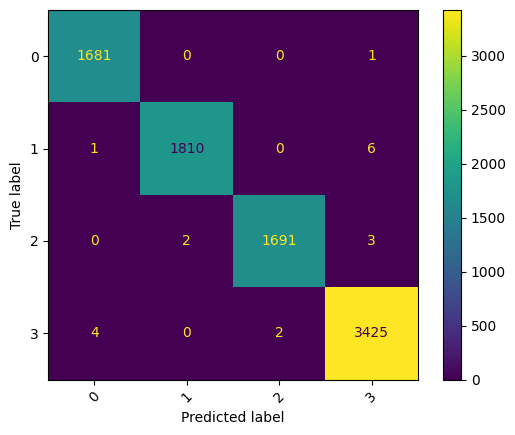

In [17]:
cm = confusion_matrix(true, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xticks(rotation=45)
plt.show()

In [10]:
# model5.quantize(input='data/train.txt', retrain=True)

# model5 = fasttext.load_model("optimized.model")

# # Пример классификации одного заголовка
# model5.predict("brand new xiaomi tv")